# Overview

This is the notebook for the book *Learning IPython for Interactive Computing and Data Visualization*.

In [5]:
%pylab inline

/home/brian/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/brian/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


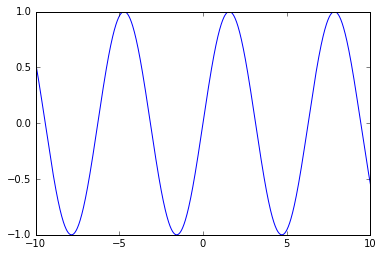

In [6]:
x=linspace(-10.,10.,1000)
plot(x,sin(x))

You can write one or several lines of code in the input cells. Here are some of the
most useful keyboard shortcuts:

• Press the Enter key to create a new line in the cell and not execute the cell

• Press Shift + Enter to execute the cell and go to the next cell

• Press Alt + Enter to execute the cell and append a new empty cell right after it

• Press Ctrl + Enter for quick instant experiments when you do not want to save the output

• Press Ctrl + M and then the H key to display the list of all the keyboard shortcuts

## Interactive Work with IPython

In [8]:
import urllib, zipfile

In [22]:
mkdir 'data'
%cd data

In [15]:
url = 'http://ipython.rossant.net/'
filename = 'facebook.zip'
downloaded = urllib.request.urlopen(url + filename)
with open(filename, 'wb') as f:
    f.write(downloaded.read())

with zipfile.ZipFile(filename) as zip:
    zip.extractall('.')

In [24]:
ls

facebook/  facebook.zip


In [20]:
%alias

Total number of aliases: 12


[('cat', 'cat'),
 ('cp', 'cp'),
 ('ldir', 'ls -F -o --color %l | grep /$'),
 ('lf', 'ls -F -o --color %l | grep ^-'),
 ('lk', 'ls -F -o --color %l | grep ^l'),
 ('ll', 'ls -F -o --color'),
 ('ls', 'ls -F --color'),
 ('lx', 'ls -F -o --color %l | grep ^-..x'),
 ('mkdir', 'mkdir'),
 ('mv', 'mv'),
 ('rm', 'rm'),
 ('rmdir', 'rmdir')]

In [25]:
%cd facebook
%bookmark fbdata

/home/brian/github/pythontips/data/facebook


In [33]:
%cd fbdata
files = !ls -1 -S | grep edges

(bookmark:fbdata) -> /home/brian/github/pythontips/data/facebook
/home/brian/github/pythontips/data/facebook


In [34]:
files

['1912.edges',
 '107.edges',
 '1684.edges',
 '3437.edges',
 '348.edges',
 '0.edges',
 '414.edges',
 '686.edges',
 '698.edges',
 '3980.edges']

In [35]:
!head -n5 {files[0]}

2290 2363
2346 2025
2140 2428
2201 2506
2425 2557


In [37]:
%alias largest ls -1sSh | grep %s

In [38]:
largest circles

8.0K 1912.circles
4.0K 1684.circles
4.0K 107.circles
4.0K 348.circles
4.0K 686.circles
4.0K 0.circles
4.0K 3437.circles
4.0K 414.circles
4.0K 698.circles
4.0K 3980.circles


In [39]:
%store largest

Alias stored: largest (ls -1sSh | grep %s)


In [47]:
cd fbdata

(bookmark:fbdata) -> /home/brian/github/pythontips/data/facebook
/home/brian/github/pythontips/data/facebook


In [48]:
cd ..

/home/brian/github/pythontips/data


In [49]:
%run egos.py facebook

In [50]:
ids

[0, 107, 348, 414, 686, 698, 1684, 1912, 3437, 3980]

In [53]:
cd fbdata

(bookmark:fbdata) -> /home/brian/github/pythontips/data/facebook
/home/brian/github/pythontips/data/facebook


In [51]:
import networkx as nx

In [54]:
g = nx.read_edgelist('0.edges')

In [55]:
len(g.nodes()), len(g.edges())

(333, 2519)

In [60]:
sg = list(nx.connected_component_subgraphs(g))

In [61]:
[len(s) for s in sg]

[324, 2, 2, 2, 3]

In [62]:
sg = sg[0]

In [63]:
%timeit nx.center(sg)

10 loops, best of 3: 190 ms per loop


In [64]:
nx.radius(sg), nx.diameter(sg)

(6, 11)

In [65]:
nx.center(sg)

['277', '190', '83', '51', '307', '237', '124', '175']

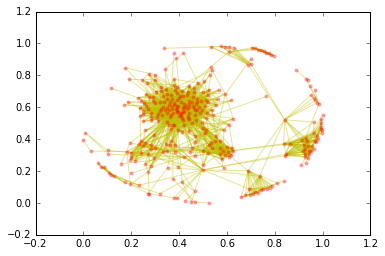

In [66]:
nx.draw_networkx(sg, node_size=15, edge_color='y', with_labels=False, alpha=.4, linewidths=0)

## Numerical Computing with IPython

In [67]:
positions = rand(10000000, 2)

In [68]:
type(positions)

numpy.ndarray

In [69]:
positions.ndim, positions.shape

(2, (10000000, 2))

In [72]:
x, y = positions[:,0], positions[:,1]

In [73]:
distances = (x - .5) ** 2 + (y - .5) ** 2

In [74]:
%timeit exec(In[73])

10 loops, best of 3: 105 ms per loop


In [75]:
cd fbdata

(bookmark:fbdata) -> /home/brian/github/pythontips/data/facebook
/home/brian/github/pythontips/data/facebook


In [76]:
loadtxt('0.edges')

array([[ 236.,  186.],
       [ 122.,  285.],
       [  24.,  346.],
       ..., 
       [  85.,   75.],
       [  98.,  332.],
       [ 291.,  339.]])